# Introduction

**How has each region’s share of global cumulative CO2 emissions changed over time?**

According to Our World in Data "CO2 emissions" (https://ourworldindata.org/co2-emissions),

"Up until 1950, more than half of historical CO2 emissions were emitted by Europe. The vast majority of European emissions back then were emitted by the United Kingdom; as the data shows, until 1882 more than half of the world’s cumulative emissions came from the UK alone. Over the century which followed, industrialization in the USA rapidly increased its contribution.It’s only over the past 50 years that growth in South America, Asia and Africa have increased these regions’ share of total contribution."

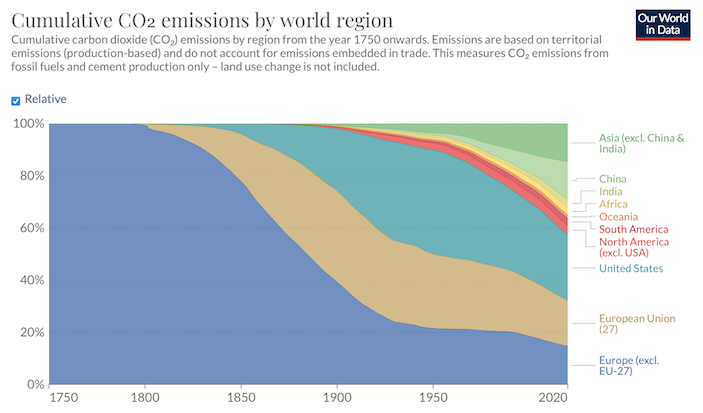

reference : Our World in Data "CO2 emissions" (https://ourworldindata.org/co2-emissions

So I will look into country by country and try to find what cause CO2 gap among countries in this notebook.

# Importing and data preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/co2-emission-by-countries-year-wise-17502022/CO2 emission by countries.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/co2-emission-by-countries-year-wise-17502022/CO2 emission by countries.csv',encoding='latin1')

**Data outline**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [5]:
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


**Convert string to float**

In [6]:
df["% of World"] = df["% of World"].str.replace('%','', regex=True)
df['% of World'] = df['% of World'].astype(float)

df["Density(km2)"] = df["Density(km2)"].str.replace('km²','', regex=True)
df["Density(km2)"] = df["Density(km2)"].str.replace('/','', regex=True)
df["Density(km2)"] = df["Density(km2)"].str.replace(',','.', regex=True)
df['Density(km2)'] = df['Density(km2)'].astype(float)

In [7]:
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.4,63.0


**Data description**

In [8]:
df.describe()

,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04,55284.000000,53116.000000
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05,0.415686,139.044474
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06,1.202112,159.149245
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01,0.000000,0.000000
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04,0.000000,28.750000
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05,0.100000,82.000000
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05,0.300000,196.000000
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07,11.000000,872.000000


# Visualization and analysis

**Global Cumulative CO2 Emisiion since 1750**

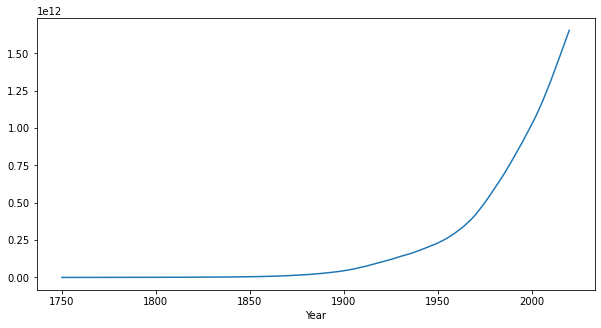

In [9]:
df.groupby('Year')['CO2 emission (Tons)'].sum().plot(figsize=(10,5));

We can see that cumulative CO2 emission inceresed rapidly. Accordint to United States Environmental Protection Agency,

"Global carbon emissions from fossil fuels have significantly increased since 1900. Since 1970, CO2 emissions have increased by about 90%, with emissions from fossil fuel combustion and industrial processes contributing about 78% of the total greenhouse gas emissions increase from 1970 to 2011. Agriculture, deforestation, and other land-use changes have been the second-largest contributors.
Emissions of non-CO2 greenhouse gases have also increased significantly since 1900."

reference: Global Greenhouse Gas Emissions Data(https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data)

**Top 30 cumulative CO2 emission countries**

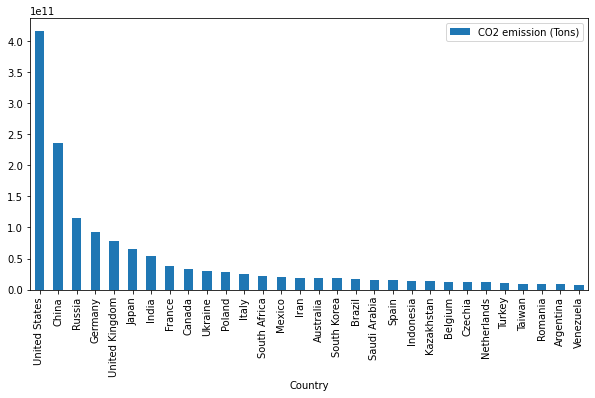

In [10]:
df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(30).plot.bar(x='Country',y='CO2 emission (Tons)',figsize=(10,5));

United States and China are outstanding. 5 top countries seem to have huge influence and impact to the world.

**How much do top 5 countries occupy CO2 emission in 2020?**

In [11]:
df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(5)['CO2 emission (Tons)'].sum()/df[df['Year']==2020]['CO2 emission (Tons)'].sum()

0.5675616513903374

Top 5 countries occupy 57% of global cumulative CO2 emission !!

**How many people do top 5 countries have in 2020?**

In [12]:
df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(5)['Population(2022)'].sum()/df[df['Year']==2020]['Population(2022)'].sum()

0.26323504999824004

57% of Cumulative CO2  Emission comes from 26% of population !

**Time series of cumulative CO2 emission of top 5 countries**

In [13]:
df_top5=df[(df['Country']=='United States')|(df['Country']=='China')|(df['Country']=='Russia')|
           (df['Country']=='Germany')|(df['Country']=='United Kingdom')]

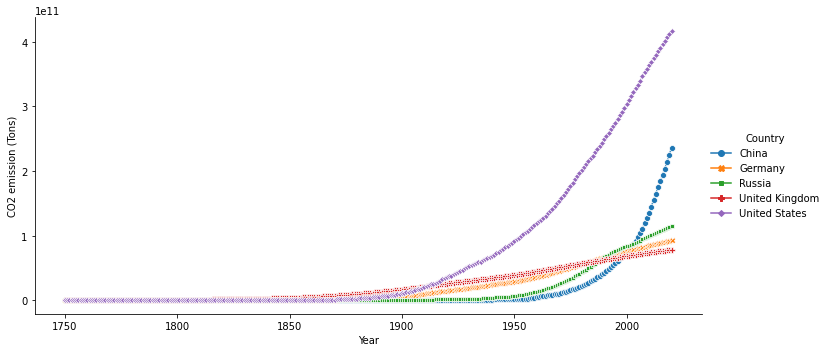

In [14]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)", 
            data=df_top5, kind="line", 
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

Cumulative CO2 emission of United States began to incerese rapidly early 1900s, and that of china began to incerese rapidly late 1900s.

**Comparing 1750, 1800, 1850, 1900, 1950, 2000, 2010 and 2020 among 5 top countries**

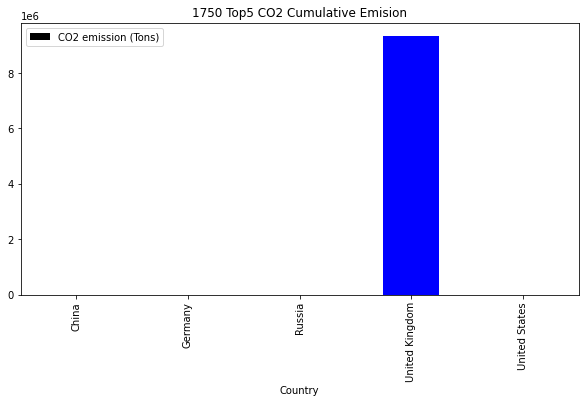

In [15]:
df_top5[df_top5['Year']==1750].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='1750 Top5 CO2 Cumulative Emision');

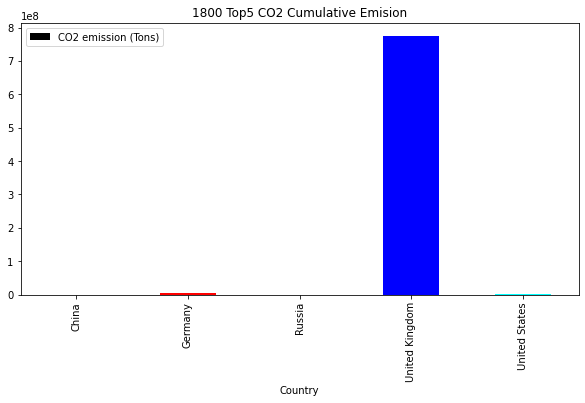

In [16]:
df_top5[df_top5['Year']==1800].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='1800 Top5 CO2 Cumulative Emision');

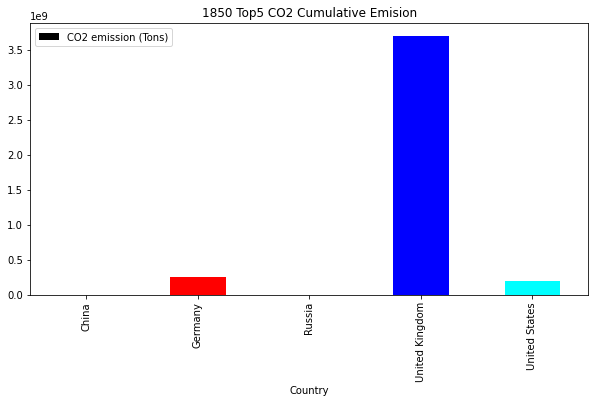

In [17]:
df_top5[df_top5['Year']==1850].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='1850 Top5 CO2 Cumulative Emision');

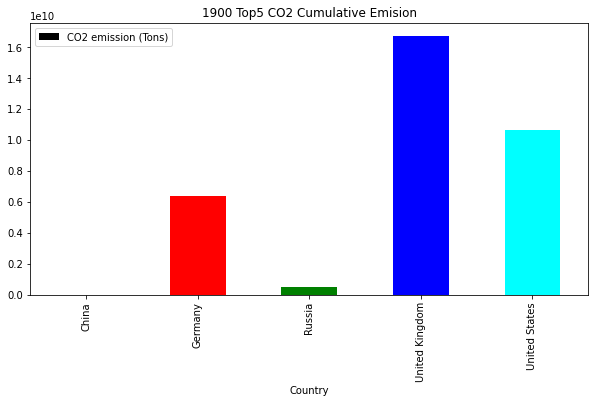

In [18]:
df_top5[df_top5['Year']==1900].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='1900 Top5 CO2 Cumulative Emision');

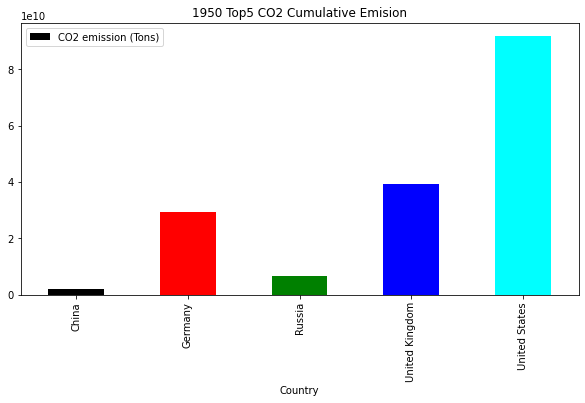

In [19]:
df_top5[df_top5['Year']==1950].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='1950 Top5 CO2 Cumulative Emision');

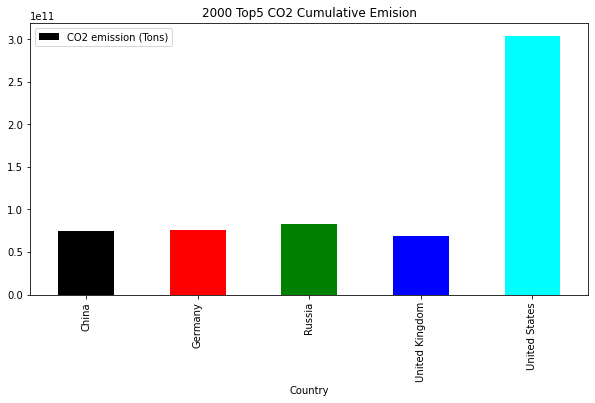

In [20]:
df_top5[df_top5['Year']==2000].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='2000 Top5 CO2 Cumulative Emision');

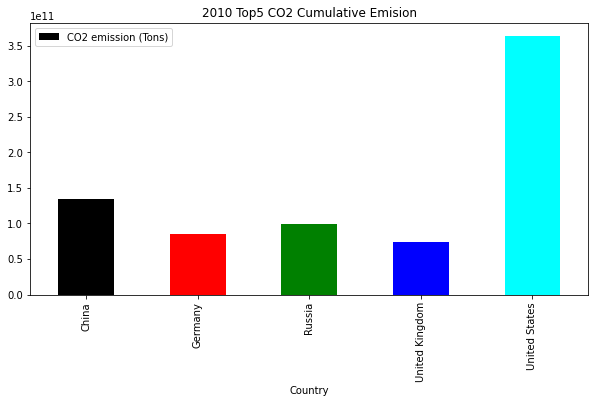

In [21]:
df_top5[df_top5['Year']==2010].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='2010 Top5 CO2 Cumulative Emision');

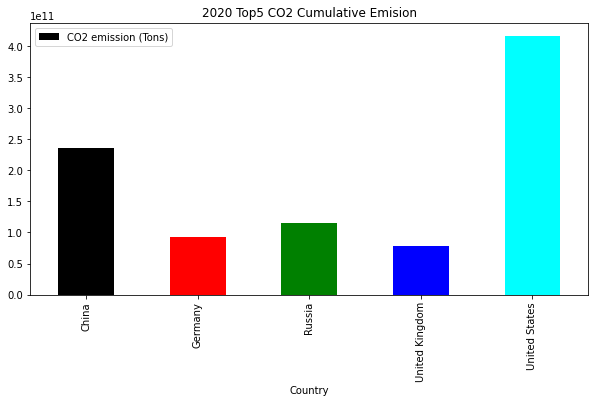

In [22]:
df_top5[df_top5['Year']==2020].plot.bar(x='Country',y='CO2 emission (Tons)',
                                        figsize=(10,5),color=['black', 'red', 'green', 'blue', 'cyan'],
                                        title='2020 Top5 CO2 Cumulative Emision');

* In 1750 and 1800s, United Kingdom occupies most of cumulative CO2 emission. In 1800, Germany and United States began to make a littke bit contribution.
* In 1900s, United States became the top player of Cumulative CO2  Emission and in 2000s, China have been increasing their influence rapidly.

**Cumulative CO2 Emission per person in 2020**

In [23]:
df['CO2_per']=df['CO2 emission (Tons)']/df['Population(2022)']
df[df['Year']==2020].sort_values(by='CO2_per', ascending=False).head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),CO2_per
57180,United States,US,1,2020,4.170000e+11,338289857.0,9372610.0,6.1,36.0,1232.670715
17072,Estonia,EE,372,2020,1.630194e+09,1326062.0,45227.0,0.0,29.0,1229.349981
30893,Luxembourg,LU,352,2020,7.536860e+08,647599.0,2586.0,0.0,250.0,1163.815826
56909,United Kingdom,GB,44,2020,7.816115e+10,67508936.0,242900.0,0.2,278.0,1157.789624
20324,Germany,DE,49,2020,9.263562e+10,83369843.0,357114.0,0.2,233.0,1111.140573
5419,Belgium,BE,32,2020,1.254314e+10,11655930.0,30528.0,0.0,382.0,1076.116824
54470,Trinidad and Tobago,TT,1-868,2020,1.569561e+09,1531044.0,5130.0,0.0,298.0,1025.157423
9484,Canada,CA,1,2020,3.357674e+10,38454327.0,9984670.0,6.1,4.0,873.159042
7858,Brunei,BN,673,2020,3.603752e+08,449002.0,NaN,NaN,78.0,802.613779
44443,Russia,NaN,7,2020,1.150000e+11,144713314.0,17098242.0,11.0,8.0,794.674635


In top 10 cumulative CO2 emission per person in 2020, Estonia, Luxembourg, Trinidad and Tobago, and Brunei are not in cumulative CO2 emission countries. 

**Time series of Cumulative CO2 Emission per person in 2020 ( exclusing United States, China, Russia, Germany and United Kingdom )**

In [24]:
df_others=df[(df['Country']=='Estonia')|(df['Country']=='Luxembourg')|(df['Country']=='Belgium')|
           (df['Country']=='Trinidad and Tobago')|(df['Country']=='Brunei')|(df['Country']=='Canada')]

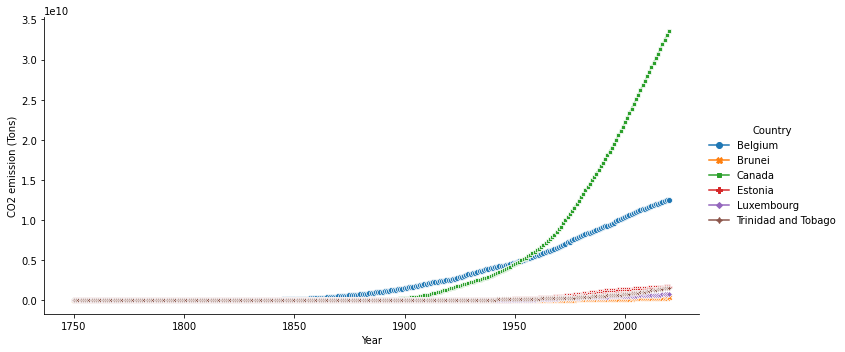

In [25]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)", 
            data=df_others, kind="line", 
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

Canada and Belgium have been increasing larger than other 4 countries very much. So I also tried to focus on Estonia, Luxembourg, Trinidad and Tobago and Brunei.

In [26]:
df_others2=df[(df['Country']=='Estonia')|(df['Country']=='Luxembourg')|
           (df['Country']=='Trinidad and Tobago')|(df['Country']=='Brunei')]

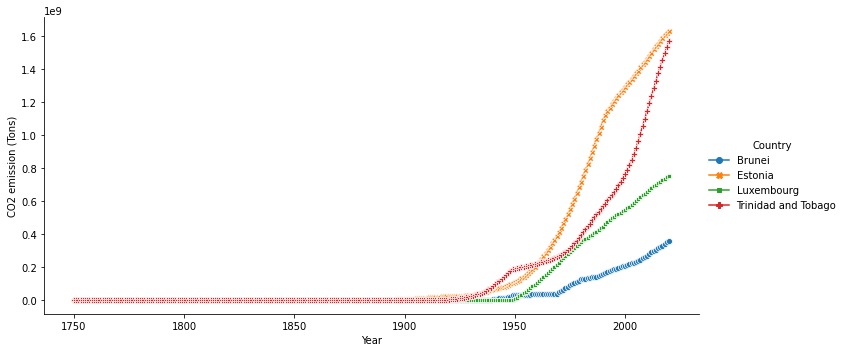

In [27]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)", 
            data=df_others2, kind="line", 
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

Estonia, Luxembourg, Trinidad and Tobago and Brunei have been also increasing rapidly since around 1950. It may have some relationship with industrization which increase income.

**Case Study - Brunei**

Brunei is a small nation on the island of Borneo, in 2 distinct sections surrounded by Malaysia and the South China Sea. It's known for its beaches and biodiverse rainforest, much of it protected within reserves. Why is Cumulative CO2 Emission per person in 2020 of Brunei so high ?

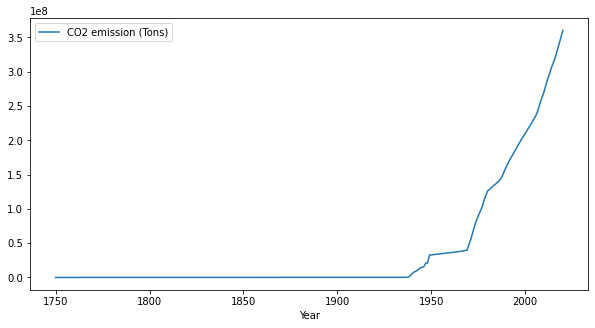

In [28]:
df[df['Country']=='Brunei'].plot(x='Year',y='CO2 emission (Tons)',figsize=(10,5));

Around 1950, cumulative CO2 emission of Brunei began to rise rapidly. What caused this ?

According to Britannica,

"**Brunei’s economy is almost totally dependent on the exploitation of its vast reserves of petroleum and natural gas. Although oil and gas revenues have allowed the state to give its citizens one of the highest per capita incomes in Asia, they also have made the country dependent on a single commodity that is subject to market fluctuations. In addition, Brunei must rely on imports for nearly all its manufactured goods and most of its food. In an effort to ensure the country’s economic stability, the government has since the late 20th century striven to diversify the economy by developing other sectors, such as agriculture, fisheries, tourism, and financial services.**"

reference: https://www.britannica.com/place/Brunei/Economy

We may be able to find some tips in the article "Overview of Brunei Darussalam’s Oil and Gas Industry" (https://www.pa.gov.bn/oil-and-gas-in-brunei/).

**"Brunei’s economy has been dominated by the oil and gas upstream and downstream industries for the past 90 years. From the first well discovery in Ayer Berkunchi in 1899 to the establishment of Petroleum Authority of Brunei Darussalam in 2019 – Brunei Darussalam’s oil and gas industry has long fueled the growth and development of the country. The history of the oil industry in Brunei began in 1899 when the first exploration well was drilled near the capital, Brunei Town. It was then followed by the discovery of the Seria field in the Belait District in 1929 and a series of commercial discoveries that culminated in Brunei’s first oil export in 1932. Brunei Shell Petroleum (BSP) is the largest oil producer in Brunei and contributes around 90 per cent to Brunei’s oil and gas revenues."**

reference : https://www.pa.gov.bn/oil-and-gas-in-brunei/

**Actually, Burunei is in high income countries.**

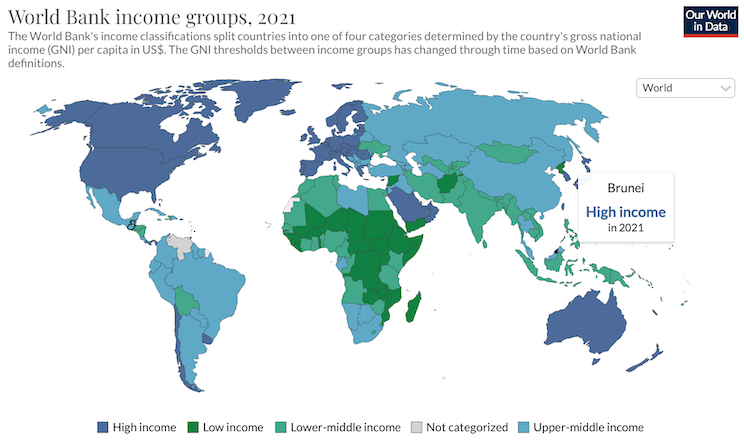

image from Our World in Data "CO2 emissions" (https://ourworldindata.org/co2-emissions),

**As next step, I tried to find what cause "Global inequalities in CO2 emissions"**

According to Our World in Data "CO2 emissions" (https://ourworldindata.org/co2-emissions),

**"There are two parameters that determine our collective carbon dioxide (CO2) emissions: the number of people, and quantity emitted per person. 
We either talk about total annual or per capita emissions. They tell very different stories and this often results in confrontation over who can 
really make an impact: rich countries with high per capita emissions, or those with a large population.To help us understand the global distribution 
of per capita emissions and population, we have visualized global CO2 emissions by (1) World Bank income group and (2) by world region. The world’s total CO2 emissions9 are shown on the basis of two axes: the height of the bar (y-axis) is the average per capita CO2 emissions and 
the length of the box (x-axis) is the total population. Since total emissions are equal to per capita emissions multiplied by the number of people, 
the area of each box represents total emissions."**

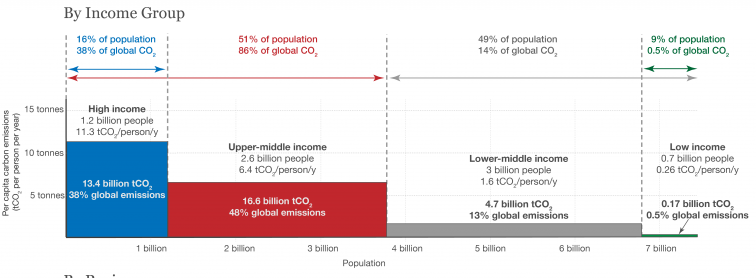

reference : Our World in Data "CO2 emissions" (https://ourworldindata.org/co2-emissions

In the chart, we can find that
* High income countries which have 16% of population occupy 38% of global CO2.
* High and upper-middle income countries which have 51% of population occupy 86% of global CO2.

In the case of Brunei, we can find that industrization in the exploitation of its vast reserves of petroleum and natural gas, which made them high income country, may cause high cumulative CO2 emission per person.

Thank you !